In [294]:
import json
import pathlib

import matplotlib.ticker
import matplotlib.pylab as plt
import pandas as pd

from hubbardml import keys
from hubbardml import plots

import predict_iterations

In [295]:
EXPERIMENT_DIR = pathlib.Path(
    "outputs/predict_iterations/batch_size=64,max_epochs=12000/2023-08-20_21-37-56"
)
# EXPERIMENT_DIR = pathlib.Path(
#     "outputs/predict_iterations/batch_size=32,max_epochs=12000/2023-08-19_15-14-39"
# )
EXPERIMENT_DIR = pathlib.Path(
    "outputs/predict_iterations/batch_size=32,max_epochs=12000/2023-08-21_10-31-28"
)

DATASET = "dataset.json"
RESULTS_FILE = "hubbard_u_iterations.json"

In [296]:
uv_data = pd.read_json(EXPERIMENT_DIR / DATASET)
uv_data

,dir,material,is_vdw,uv_iter,formula,cell,n_atoms_uc,person,structure_index,pw_time_unix,...,atom_2_occs_1,atom_2_occs_2,atom_2_frac_coords,atom_2_starting_mag,atom_2_final_mag,param_delta,species,label,colour,sc_paths
0,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,"[[0.62, -0.116, -0.011, -0.006, -0.003], [-0.1...","[[0.62, -0.116, -0.011, -0.006, -0.003], [-0.1...","[0.0, 0.0, 0.0]",0.0,0.0000,10.2709,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...
64,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,"[[0.62, -0.116, -0.011, -0.006, -0.003], [-0.1...","[[0.62, -0.116, -0.011, -0.006, -0.003], [-0.1...","[0.5, 0.0, 0.0]",0.0,0.0000,10.2709,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...
128,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,"[[0.801, 0.081, -0.011, -0.007, 0.003], [0.081...","[[0.454, 0.106, -0.003, -0.004, 0.001], [0.106...","[0.25, 0.5, 0.0]",1.0,0.7291,9.6452,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...
192,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,"[[0.454, 0.106, -0.003, -0.004, 0.001], [0.106...","[[0.801, 0.081, -0.011, -0.007, 0.003], [0.081...","[0.75, 0.5, 0.0]",1.0,-0.7291,9.6452,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...
256,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...,b-type,False,1,,"[20.4521, 0.0, 0.0, 0.0, 10.1708088779, 0.0, -...",80,luca,1,1594004350,...,"[[0.801, 0.081, 0.011, -0.007, -0.003], [0.081...","[[0.454, 0.106, 0.003, -0.004, -0.001], [0.106...","[0.0, 0.0, 0.25]",1.0,0.7290,9.6452,[Ni],Ni,#50D050,/Users/azadoks/Data/uv_ml/luca/PrNiO3/by_type/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420759,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,Mn2O4,False,3,,"[15.4309, 0.0, 0.0, 0.0, 15.4304216421, 0.0, 0...",48,iurii,142,1638445240,...,"[[0.28, 0.009000000000000001, 0.01, 0.003, -0....","[[0.618, -0.012, -0.01, -0.008, 0.024], [-0.01...","[0.75, 0.75, 0.5]",0.0,-2.9633,-0.0016,[Mn],Mn,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...
421143,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,Mn2O4,False,3,,"[15.4309, 0.0, 0.0, 0.0, 15.4304216421, 0.0, 0...",48,iurii,142,1638445240,...,"[[0.618, 0.012, 0.01, -0.008, 0.024], [0.012, ...","[[0.28, -0.009000000000000001, -0.01, 0.003, -...","[0.5, 0.0, 0.0]",0.0,2.9633,-0.0016,[Mn],Mn,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...
421527,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,Mn2O4,False,3,,"[15.4309, 0.0, 0.0, 0.0, 15.4304216421, 0.0, 0...",48,iurii,142,1638445240,...,"[[0.618, 0.012, 0.01, -0.008, 0.024], [0.012, ...","[[0.28, -0.009000000000000001, -0.01, 0.003, -...","[0.0, 0.5, 0.0]",0.0,2.9633,-0.0016,[Mn],Mn,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...
421911,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...,Mn2O4,False,3,,"[15.4309, 0.0, 0.0, 0.0, 15.4304216421, 0.0, 0...",48,iurii,142,1638445240,...,"[[0.618, -0.01, -0.011, 0.008, 0.024], [-0.01,...","[[0.28, 0.01, 0.009000000000000001, -0.003, -0...","[0.25, 0.75, 0.0]",0.0,2.9633,-0.0016,[Mn],Mn,#9C7AC7,/Users/azadoks/Data/uv_ml/iurii/Spinel/LixMn2O...


In [297]:
def create_plots(df: pd.DataFrame, logy=False, scale=1.0):

    if predict_iterations.Keys.TRAIN_RMSE in df:
        cols = [predict_iterations.Keys.TRAIN_RMSE, predict_iterations.Keys.MODEL_RMSE, predict_iterations.Keys.REF_RMSE]
        series_labels = 'ML (train)', 'ML (validate)', "Reference"
        colours = plots.train_validate_colours[keys.TRAIN], plots.train_validate_colours[keys.VALIDATE], plots.train_validate_colours[keys.REFERENCE],  
    else:
        cols = [predict_iterations.Keys.MODEL_RMSE, predict_iterations.Keys.REF_RMSE]
        series_labels = 'ML (validate)', "Reference"
        colours = plots.train_validate_colours[keys.TRAIN], plots.train_validate_colours[keys.REFERENCE],  

    # ref_rmse = frame.iloc[0][olivines.Keys.REF_RMSE]  # They are all the same

    fig = plt.figure(figsize=(6 * scale, 4 * scale))
    ax = fig.gca()
    
    print(df)

    ax = df.plot(
        x=keys.UV_ITER,
        y=cols,
        ax=ax,
        color=colours,
        marker='o',
        linestyle="--",
        logy=logy,
        title="RMSE as function of training iterations",
        ylabel='RMSE (eV)',
        xlabel="$N$, training on all previous linear-response results",
    );

    ax.legend(series_labels)
    ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
    ax.set_ylim([0, 1.6])
    # ax.set_yscale("log")

    return ax

# Data analysis

In [298]:
results_file = EXPERIMENT_DIR / RESULTS_FILE
with open(results_file, 'r') as file:
    hubbard_u_iterations = pd.DataFrame(json.load(file))
hubbard_u_iterations

,uv_iter,model_rmse,train_rmse,ref_rmse
0,2.0,0.996858,0.059534,1.154636
1,3.0,0.212180,0.087323,0.263061
2,4.0,0.231229,0.132370,0.374320
3,5.0,0.085891,0.125576,0.229228


   uv_iter  model_rmse  train_rmse  ref_rmse
0      2.0    0.996858    0.059534  1.154636
1      3.0    0.212180    0.087323  0.263061
2      4.0    0.231229    0.132370  0.374320
3      5.0    0.085891    0.125576  0.229228


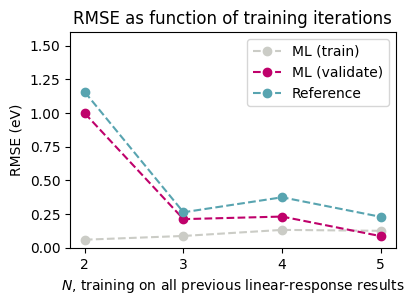

In [299]:
output_dir = EXPERIMENT_DIR
plot_dir = output_dir / "plots"
plot_dir.mkdir(exist_ok=True)

ax = create_plots(hubbard_u_iterations, scale=0.7)
ax.get_figure().savefig(plot_dir/ f"iteration_comparison.pdf", bbox_inches='tight')

In [300]:
plot_dir

PosixPath('outputs/predict_iterations/batch_size=32,max_epochs=12000/2023-08-21_10-31-28/plots')

In [301]:
for group_name, group in iter_2.groupby(keys.TRAINING_LABEL):
    print(group_name, group.value_counts(keys.ATOM_1_ELEMENT))


duplicate atom_1_element
Ni    144
Mn    103
Fe     14
Name: count, dtype: int64
train atom_1_element
Mn    84
Ni    62
Fe    30
Name: count, dtype: int64
validate atom_1_element
Mn    77
Fe    72
Ni    50
Name: count, dtype: int64


In [302]:
iter_2.groupby(keys.TRAINING_LABEL).apply(lambda grp: print(grp.value_counts(keys.LABEL)))

label
Ni    144
Mn    103
Fe     14
Name: count, dtype: int64
label
Mn    84
Ni    62
Fe    30
Name: count, dtype: int64
label
Mn    77
Fe    72
Ni    50
Name: count, dtype: int64


""


In [303]:
iter_2[[keys.TRAINING_LABEL, keys.LABEL]].groupby(keys.TRAINING_LABEL).value_counts(sort=False)

training_label  label
duplicate       Fe        14
                Mn       103
                Ni       144
train           Fe        30
                Mn        84
                Ni        62
validate        Fe        72
                Mn        77
                Ni        50
Name: count, dtype: int64